C:\Users\Abhijit\AppData\Local\Temp\ipykernel_9360\2649947920.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


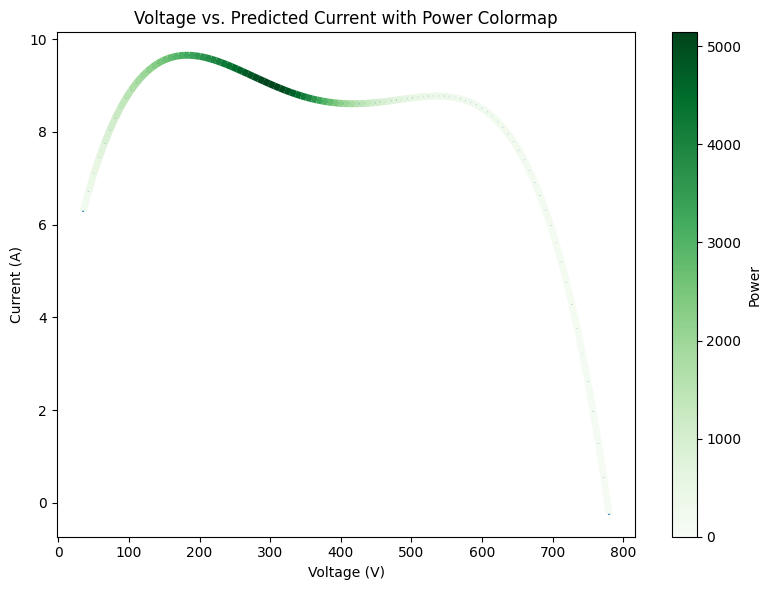

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from matplotlib.collections import LineCollection

df = pd.read_csv('iv.csv')
df.drop(columns=['Source'], inplace=True, errors='ignore')
df.fillna(0, inplace=True)

X = df[['Voltage', 'Current']].values
y_current = df['Current'].values
y_power = df['Pmax'].values
X_train, X_test, y_train_current, y_test_current, y_train_power, y_test_power = train_test_split(X, y_current, y_power, test_size=0.2, random_state=42)

poly_current = PolynomialFeatures(degree=4)
X_train_poly_current = poly_current.fit_transform(X_train[:, 0].reshape(-1, 1))
X_test_poly_current = poly_current.transform(X_test[:, 0].reshape(-1, 1))

lin_reg_current = LinearRegression()
lin_reg_current.fit(X_train_poly_current, y_train_current)

poly_power = PolynomialFeatures(degree=4)
X_train_poly_power = poly_power.fit_transform(X_train)
X_test_poly_power = poly_power.transform(X_test)

lin_reg_power = LinearRegression()
lin_reg_power.fit(X_train_poly_power, y_train_power)

x1 = 35.22
x2 = 779.92
x_values = np.linspace(x1, x2, 100).reshape(-1, 1)

predicted_current = lin_reg_current.predict(poly_current.transform(x_values))
predicted_power = lin_reg_power.predict(poly_power.transform(np.hstack((x_values, predicted_current.reshape(-1, 1)))))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_values, predicted_current)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')
ax.set_title('Voltage vs. Predicted Current with Power Colormap')

# Constructing points array
points = np.column_stack((x_values.flatten(), predicted_current.flatten()))
segments = np.stack((points[:-1], points[1:]), axis=1)

norm = plt.Normalize(y_power.min(), y_power.max())
lc = LineCollection(segments, cmap='Greens', norm=norm)
lc.set_array(y_power)
lc.set_linewidth(5)
ax.add_collection(lc)
cbar = fig.colorbar(lc, ax=ax, label='Power')

plt.tight_layout()
plt.show()
